In [1]:
! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 25 (delta 2), reused 1 (delta 1), pack-reused 21
Receiving objects: 100% (25/25), 5.04 MiB | 10.58 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

Q1. This question is a case study for  means clustering.

Load the airbnb_hw.csv data. Clean Price along with Beds, Number of Reviews, and Review Scores Rating.

Maxmin normalize the data and remove any nan's (KMeans from sklearn doesn't accept nan input).

Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6.

Use seaborn's .pairplot() to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

Use .groupby and .describe to compute the average price for each cluster. Which clusters have the highest rental prices?

Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [3]:
df = pd.read_csv('./kmc/data/airbnb_hw.csv')
print(df.shape)
print(df.head())
# gotta clean price, beds, number of reviews, reviews scores rating
ddf = df.loc[:,['Price','Beds','Number Of Reviews','Review Scores Rating']]

(30478, 13)
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  Rev

In [4]:
ddf.describe()

,Beds,Number Of Reviews,Review Scores Rating
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [5]:
prices = ddf['Price']
prices.unique()
prices.value_counts()

150      1481
100      1207
200      1059
125       889
75        873
         ... 
840         1
306         1
2,695       1
2,520       1
291         1
Name: Price, Length: 511, dtype: int64

In [6]:
prices = ddf['Price'] # just restating this because it got weird when I didn't tell it that I was using this little variable for 'Price' again
prices = prices.str.replace(',','') # kicks out the commas from the strings
print(prices.unique()) # looking again to see what the numbers are like with no commas, still strings
prices = pd.to_numeric(prices,errors='coerce') # forces the strings to be typecast as numeric values (as they should be)
print(prices.unique()) # looking again to make sure nothing's weird
print('Total missing: ', sum(prices.isnull())) # yeah, definitely had to look at the solutions for this one, but it calculates and prints the total number of missing (NaN) values in the 'price' column

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' '47

In [7]:
ddf['Price'] = prices
del prices # gets rid of my temporary variable
ddf['Price'].value_counts()

150     1481
100     1207
200     1059
125      889
75       873
        ... 
840        1
306        1
2695       1
2520       1
291        1
Name: Price, Length: 511, dtype: int64

Price is cleaned (I reused code from the wrangling assignment)

In [8]:
beds = ddf['Beds']
beds.unique()
beds.value_counts()

1.0     20344
2.0      6610
3.0      2071
4.0       783
5.0       284
6.0       177
7.0        45
8.0        24
10.0       16
9.0        15
16.0       13
11.0        5
12.0        4
0.0         2
Name: Beds, dtype: int64

In [9]:
print('Total missing: ', sum(beds.isnull()))

Total missing:  85


85 missing values

In [10]:
beds = ddf['Beds'].fillna(1) # fill in the missing values

cleaned beds. just had to fill in the NAs.

In [11]:
ddf['Beds'] = beds
del beds # gets rid of my temporary variable
ddf['Beds'].value_counts()

1.0     20429
2.0      6610
3.0      2071
4.0       783
5.0       284
6.0       177
7.0        45
8.0        24
10.0       16
9.0        15
16.0       13
11.0        5
12.0        4
0.0         2
Name: Beds, dtype: int64

In [12]:
ddf.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [13]:
# cleaning Number of Reviews
print('Total missing: ', sum(ddf['Number Of Reviews'].isnull()))

Total missing:  0


In [14]:
ddf['Number Of Reviews'].unique()

array([  0,   1,  39,   4,   9,  80,  95,  23,  14, 120,  81,  17,  32,
        52,   3, 171,  16,  19,   2,  28,  62,   6,   5,  12,  40,  47,
        13,  35,  34,  68,  42,   7,  41,  15,  21,   8,  10,  29, 112,
        25, 132,  51, 156,  30,  98,  24,  74,  20, 188, 221,  57,  11,
       242,  67, 118,  60, 136, 119,  79, 106,  43,  91, 105,  96, 141,
       146,  63,  58,  18, 150,  38,  55,  89,  46,  77,  48,  36,  69,
        26,  73,  53, 165,  92,  87, 108, 109,  50, 127,  88,  83, 184,
       179,  22,  31,  82,  27, 123, 247, 190, 257, 217,  85, 103, 157,
       102,  56, 125, 115,  49,  97,  54,  65,  90,  44,  33, 100,  37,
       107, 114, 116,  61, 104,  71,  75, 145,  84,  93, 110, 172, 148,
       131, 154,  86,  64,  76, 129,  45, 180, 140,  78, 200, 175, 189,
       170, 187,  72, 137,  99, 101,  59,  94, 124, 223, 173, 151, 142,
       163, 121, 256, 248, 149, 128, 133,  66, 117, 176, 111,  70, 183,
       218, 192, 206, 161, 216, 191, 213, 178, 122, 153, 177, 16

looks clean to me

In [15]:
# cleaning Review Scores Rating
ddf['Review Scores Rating'].describe()

count    22155.000000
mean        91.993230
std          8.850373
min         20.000000
25%         89.000000
50%         94.000000
75%        100.000000
max        100.000000
Name: Review Scores Rating, dtype: float64

In [16]:
print('Total missing: ', sum(ddf['Review Scores Rating'].isnull())) # whole lot of missing reviews

Total missing:  8323


In [17]:
ddf['Review Scores Rating'].unique()

array([ nan,  96., 100.,  94.,  90.,  98.,  93.,  91.,  97.,  95.,  99.,
        85.,  86.,  80.,  88.,  92.,  89.,  82.,  87.,  81.,  76.,  78.,
        83.,  66.,  84.,  72.,  79.,  60.,  40.,  62.,  74.,  77.,  50.,
        71.,  75.,  73.,  69.,  65.,  68.,  70.,  67.,  64.,  20.,  57.,
        58.,  43.,  63.,  55.,  47.,  53.,  49.,  30.])

In [18]:
result = ddf.groupby([ddf['Review Scores Rating'].isnull(), df['Number Of Reviews'] > 0]).size() # fixes missing values
print(result)

Review Scores Rating  Number Of Reviews
False                 True                 22155
True                  False                 7814
                      True                   509
dtype: int64


cleaned.

In [19]:
ddf = ddf.dropna() # get rid of NAs
ddf.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


Maxmin normalize the data and remove any nan's (KMeans from sklearn doesn't accept nan input).

In [20]:
def maxmin(x): # same old maxmin function
    u = (x-min(x))/(max(x)-min(x))
    return u

X = ddf.drop('Price',axis=1) # ignoring Price right now
X = X.apply(maxmin)

In [21]:
X.describe()

,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915
std,0.065205,0.094954,0.110630
min,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500
50%,0.062500,0.023438,0.925000
75%,0.125000,0.074219,1.000000
max,1.000000,1.000000,1.000000


Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6.

In [22]:
# line below is sourced from the kmc.ipynp notes
model = KMeans(n_clusters = 6, max_iter = 300, n_init = 10, random_state = 0) # make the kmc model
# n_clusters is 6 because i'm clustering the data for k = 6
model = model.fit(X) # fit the kmc model
X['cluster'] = model.labels_

In [23]:
X.describe() # can now see the cluster column in the dataframe

,Beds,Number Of Reviews,Review Scores Rating,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,2.040081
std,0.065205,0.094954,0.110630,1.473279
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,1.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000


Use seaborn's .pairplot() to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

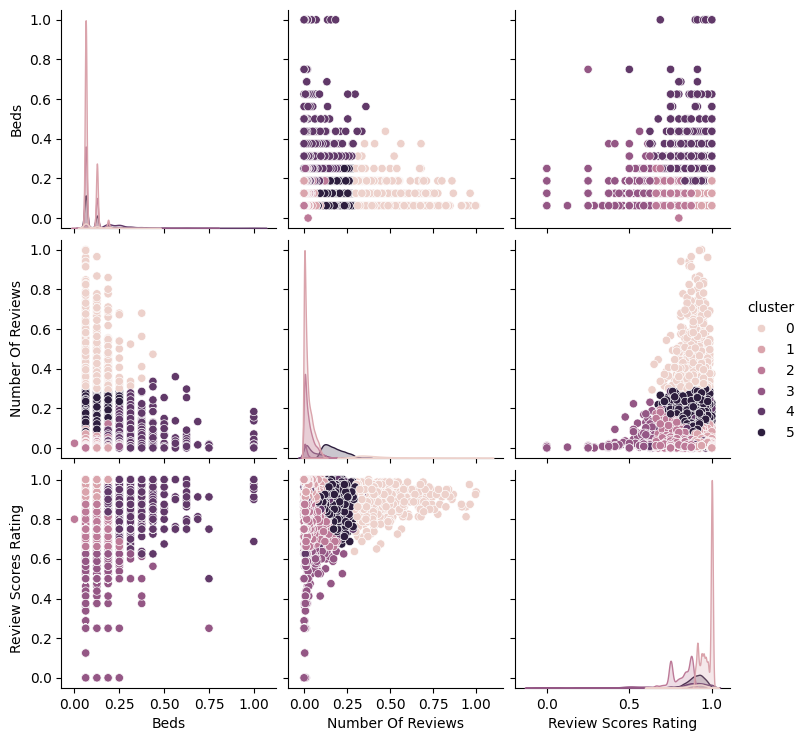

In [24]:
sns.pairplot(data = X, hue = 'cluster')

Use .groupby and .describe to compute the average price for each cluster. Which clusters have the highest rental prices?

In [25]:
ddf['cluster'] = model.labels_
ddf.loc[:,['Price','cluster'] ].groupby('cluster').describe()

Price                                                              
           count        mean         std   min     25%    50%     75%      max
cluster                                                                       
0          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0
1        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0
4         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
5         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0

Cluster 4 is the most expensive at about 300 dollars per night. The other clusters are pretty average, ranging from 130 to 150 dollars per night.

Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

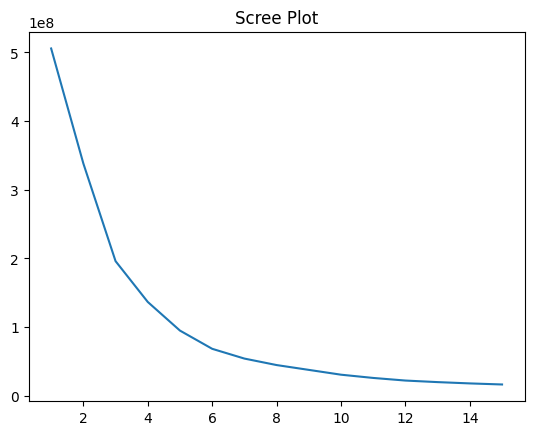

In [26]:
# code also sourced from the kmc.ipynp notes
# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(ddf) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

slight elbow around 3, so I'm going to choose that for my next analysis.

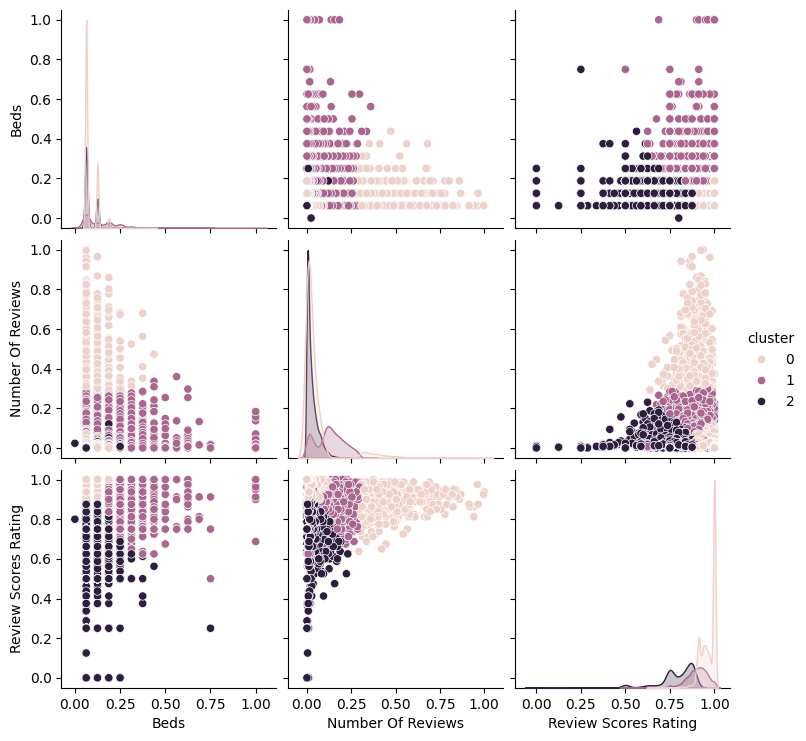

In [27]:
# repeat
# line below is sourced from the kmc.ipynp notes
model = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0) # make the kmc model
# n_clusters is 3 because i'm clustering the data for k = 3
model = model.fit(X) # fit the kmc model
X['cluster'] = model.labels_
sns.pairplot(data = X, hue = 'cluster')

In [28]:
ddf['cluster'] = model.labels_
ddf.loc[:,['Price','cluster'] ].groupby('cluster').describe()

Price                                                            
           count        mean         std   min   25%    50%     75%      max
cluster                                                                     
0        11306.0  150.899345  143.791840  10.0  85.0  129.0  189.00  10000.0
1         4663.0  194.830152  184.264122  22.0  99.0  150.0  225.00   4500.0
2         6186.0  131.710152  119.136944  20.0  75.0  110.0  168.75   5000.0

Cluster 0 has a lot of reviews as seen in the middle left plot, and the reviews tend to be pretty high according to Review Scores Rating. Cluster 2 has few reviews, and they seem pretty average. Cluster 1 has a medium number of reviews and nicely high ratings. It seems like the number of beds per cluster has little effect on the ratings, except cluster 2 has very high ratings and more beds, but that could just be beacause cluster 2 is nicer/more ammenities/etc. Cluster 1 has the highest mean price, which is acceptable because it has consistently high ratings.

Q2. This is a question about k means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking k.

Run the code below, which creates four datasets: df0_125, df0_25, df0_5, df1_0, and df2_0. Each data set is created by increasing the amount of noise (standard deviation) around the cluster centers, from 0.125 to 0.25 to 0.5 to 1.0 to 2.0.
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)

df0_25 = createData(0.25)

df0_5 = createData(0.5)

df1_0 = createData(1.0)

df2_0 = createData(2.0)

Make scatterplots of the (X1, X2) points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a k.

Explain the intuition of the elbow, using this numerical simulation as an example.

In [29]:
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

Make scatterplots of the (X1, X2) points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?







As the noise for each plot goes up, the data points become more and more spread apart. The clusters are distinguishable until 0.5, after that it is just messy. 1.0 and 2.0 aren't even clusters, more of a smear.

<Axes: xlabel='x1', ylabel='x2'>

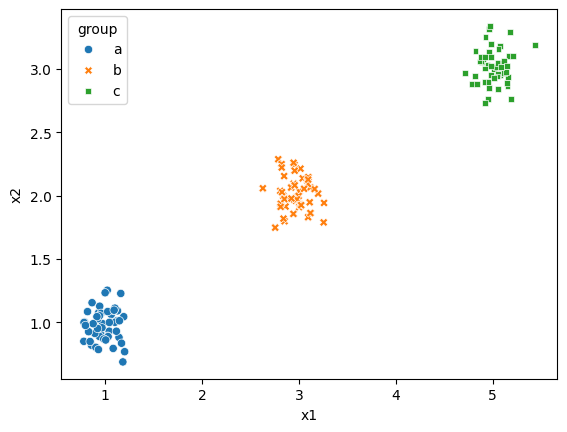

In [30]:
sns.scatterplot(data = df0_125, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

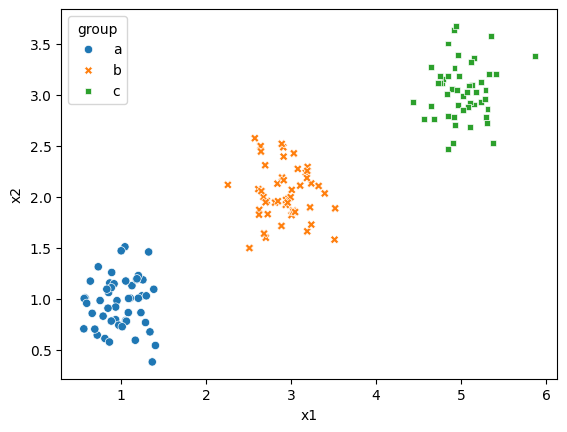

In [31]:
sns.scatterplot(data = df0_25, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

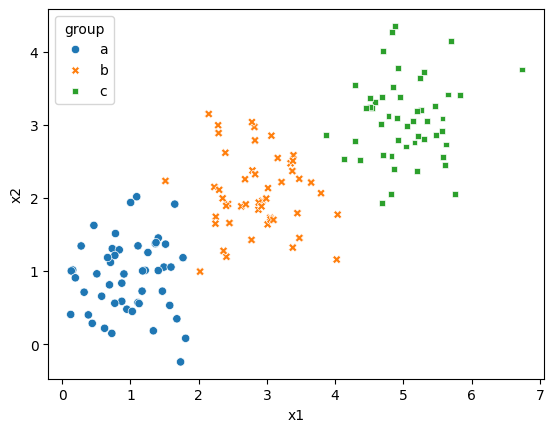

In [32]:
sns.scatterplot(data = df0_5, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

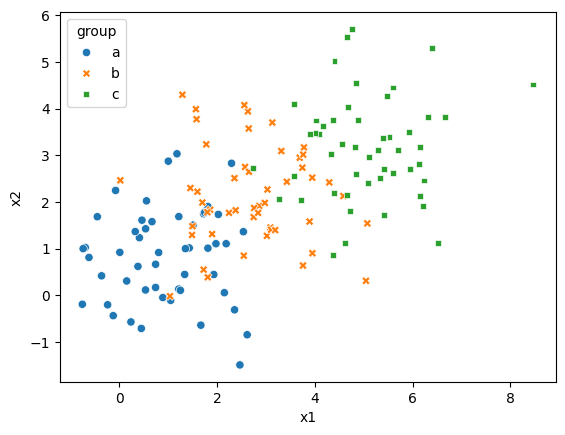

In [33]:
sns.scatterplot(data = df1_0, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

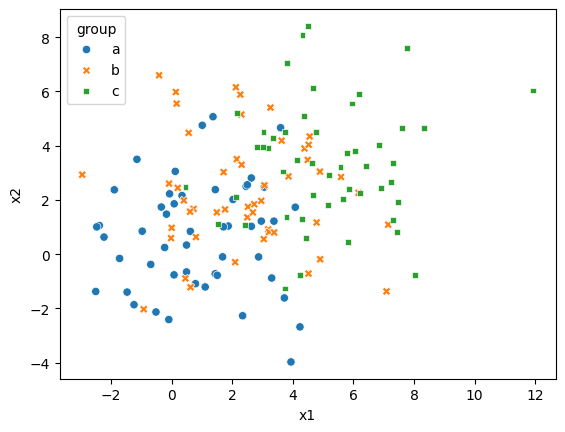

In [34]:
sns.scatterplot(data = df2_0, x = 'x1', y = 'x2', hue = 'group', style = 'group')

Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a k.

(0.0, 35.0)

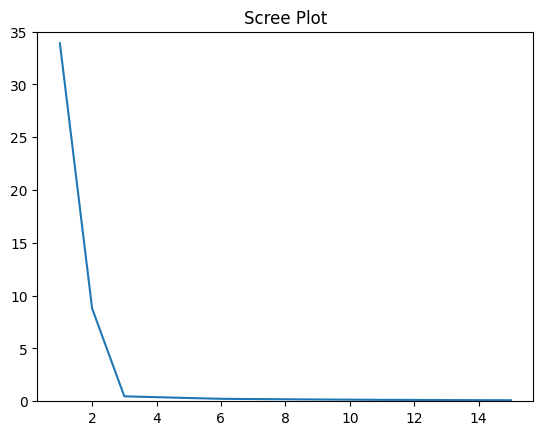

In [35]:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x
# Preprocess the data:
X = data= df0_125.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data
# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
plt.ylim(0, 35) # limits the y values

pretty obvious k=3 elbow

(0.0, 35.0)

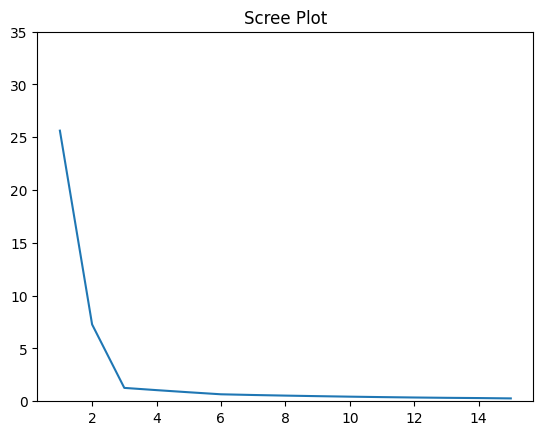

In [36]:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x
# Preprocess the data:
X = data= df0_25.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data
# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
plt.ylim(0, 35) # limits the y values

another obvious k=3 elbow

(0.0, 35.0)

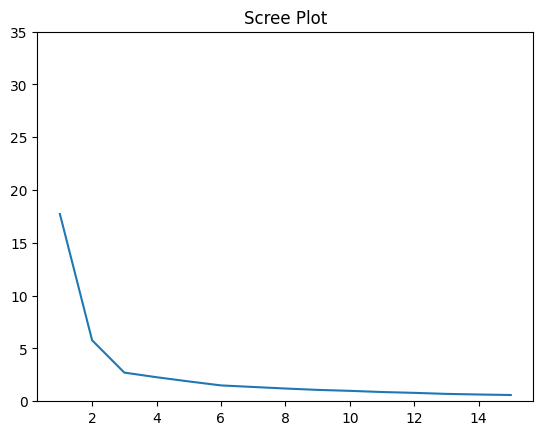

In [37]:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x
# Preprocess the data:
X = data= df0_5.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data
# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
plt.ylim(0, 35) # limits the y values

somewhat less obvious k=3 elbow

(0.0, 35.0)

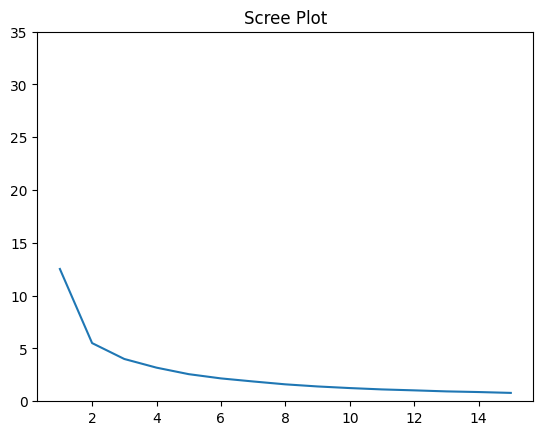

In [38]:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x
# Preprocess the data:
X = data= df1_0.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data
# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
plt.ylim(0, 35) # limits the y values

k=2 elbow kind of. different

(0.0, 35.0)

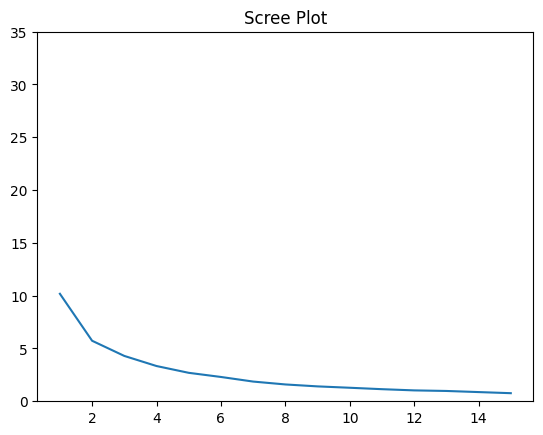

In [39]:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x
# Preprocess the data:
X = data= df2_0.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data
# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
plt.ylim(0, 35) # limits the y values

can't tell if there's an elbow.

It looks like as noise is increased, the presence of an elbow becomes less obvious. Prior to 1.0, there was a pretty consistent k=3 elbow, but 1.0 and 2.0 had decreasingly visible elbows. It's harder to select a clear k as noise increases.

Explain the intuition of the elbow, using this numerical simulation as an example.

The elbow method intuition lets you find the optimal number of clusters in a data set in the context of k Means Clustering. As cluster number increases, the fitness of the visualization improves to an extent, causing SSE to drop. But, like with most models, increasing clusters only lowers SSE to an extent, as can be seen in the scree plots above. The elbow is important to identify because that is the most optimal number of clusters before cluster number no longer has a notable effect on SSE. Past the elbow could result in an overfitted model with too much noise, and before the elbow is an underfit model with not enough going on. The elbow is important because it is where the data fits best. Looking at my analysis above, the presence of an elbow corresponds with clear clustering in the data. At 1.0 and 2.0, there is no clear elbow, and consequently that is when it is almost impossible to distinguish clusters in the scatterplots.